<a href="https://colab.research.google.com/github/vinodvicki/Creating-Cohorts-of-Songs-./blob/main/simpiliern__proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Problem Scenario:

The customer always looks forward to specialized treatment, whether shopping on
an e-commerce website or watching Netflix. The customer desires content that
aligns with their preferences. To maintain customer engagement, companies must
consistently provide the most relevant information.
Starting with Spotify, a Swedish audio streaming and media service provider, boasts
over 456 million active monthly users, including more than 195 million paid
subscribers as of September 2022. The company aims to create cohorts of different
songs to enhance song recommendations. These cohorts will be based on various
relevant features, ensuring that each group contains similar types of songs.

Problem Objective:
As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to better understand the various factors that create a cohort of songs.

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ml project simpili learn/rolling_stones_spotify.csv')
df2 = pd.read_excel('/content/drive/MyDrive/ml project simpili learn/Data Dictionary - Creating cohorts of songs.xlsx')

# Step1 : Initial data inspection and data cleaning

In [ ]:
df1.head()

,Unnamed: 0,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
df2.head()

,Variable,Description
0,name,the name of the song
1,album,the name of the album
2,release_date,the day month and year the album was released
3,track number,the order the song appears on the album
4,id,the Spotify id for the song


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1610 non-null   int64  
 1   name              1610 non-null   object 
 2   album             1610 non-null   object 
 3   release_date      1610 non-null   object 
 4   track_number      1610 non-null   int64  
 5   id                1610 non-null   object 
 6   uri               1610 non-null   object 
 7   acousticness      1610 non-null   float64
 8   danceability      1610 non-null   float64
 9   energy            1610 non-null   float64
 10  instrumentalness  1610 non-null   float64
 11  liveness          1610 non-null   float64
 12  loudness          1610 non-null   float64
 13  speechiness       1610 non-null   float64
 14  tempo             1610 non-null   float64
 15  valence           1610 non-null   float64
 16  popularity        1610 non-null   int64  


In [ ]:
df2.head()

,Variable,Description
0,name,the name of the song
1,album,the name of the album
2,release_date,the day month and year the album was released
3,track number,the order the song appears on the album
4,id,the Spotify id for the song


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     17 non-null     object
 1   Description  17 non-null     object
dtypes: object(2)
memory usage: 400.0+ bytes


In [ ]:
df1.describe()

,Unnamed: 0,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,804.500000,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,464.911282,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,0.000000,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,402.250000,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,804.500000,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,1206.750000,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,1609.000000,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [ ]:
df1.isnull().sum() / len(df1) * 100

,0
Unnamed: 0,0.0
name,0.0
album,0.0
release_date,0.0
track_number,0.0
id,0.0
uri,0.0
acousticness,0.0
danceability,0.0
energy,0.0


In [ ]:
df1.duplicated().sum()

0

In [ ]:
# droping Unnamed column
df= df1.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106


In [ ]:
df.shape

(1610, 17)

Data Structure:

The dataset contains 1,610 entries with 18 columns, including details about songs such as their name, album, release date, and various audio features like acousticness, danceability, energy, etc.
Missing Values:

There are no missing values in the dataset, so no imputation or removal of rows is necessary.
Duplicates:

There are no duplicated rows in the dataset.
Data Types:

The columns have appropriate data types, with numeric columns like acousticness, danceability, energy, etc., being of float type and others like name, album, and release_date being object types.

# Step 2. Refine the data

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats

In [25]:
# converting release_date in to date time
df['release_date']= pd.to_datetime(df['release_date'])

# extracting year from the release_date
df['year'] = df['release_date'].dt.year

# extracting month from the release_date
df['month'] = df['release_date'].dt.month

# extracting day from the release_date
df['day'] = df['release_date'].dt.day


In [26]:
# Normalize numerical features
numeric_col = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
scaler = StandardScaler()
df[numeric_col] = scaler.fit_transform(df[numeric_col])


In [28]:
df[numeric_col]

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.739355,-0.041343,1.115764,3.012099,1.261552,-1.985045,0.784410,-0.276517,-2.387590
1,0.820518,-1.007963,0.960062,0.249238,1.344648,0.724545,0.123753,0.183852,-1.142678
2,0.728140,-0.584626,0.982305,0.853953,1.330321,0.680109,0.881280,0.136323,-1.164306
3,1.392383,-0.704571,1.071278,-0.594080,1.155532,0.479980,2.392459,0.236514,-1.882359
4,0.657756,-1.170242,0.982305,-0.392050,1.358975,0.625984,0.455050,0.152303,-1.627147
...,...,...,...,...,...,...,...,...,...
1605,-0.411192,-0.020176,0.776555,-0.572125,-0.480613,-0.749192,-0.515591,1.753944,1.664646
1606,-0.848449,0.283215,-0.480188,-0.594461,0.069544,-0.820356,0.286496,-0.139166,-0.588999
1607,0.530186,2.265844,-0.102053,-0.594467,-1.217308,-0.330558,0.048195,-0.993931,1.093665
1608,-0.147254,1.630838,-1.369917,-0.594213,-0.933346,-0.867131,-0.141672,-0.802344,-0.216997


In [30]:
# Handle missing values
df = df.dropna()

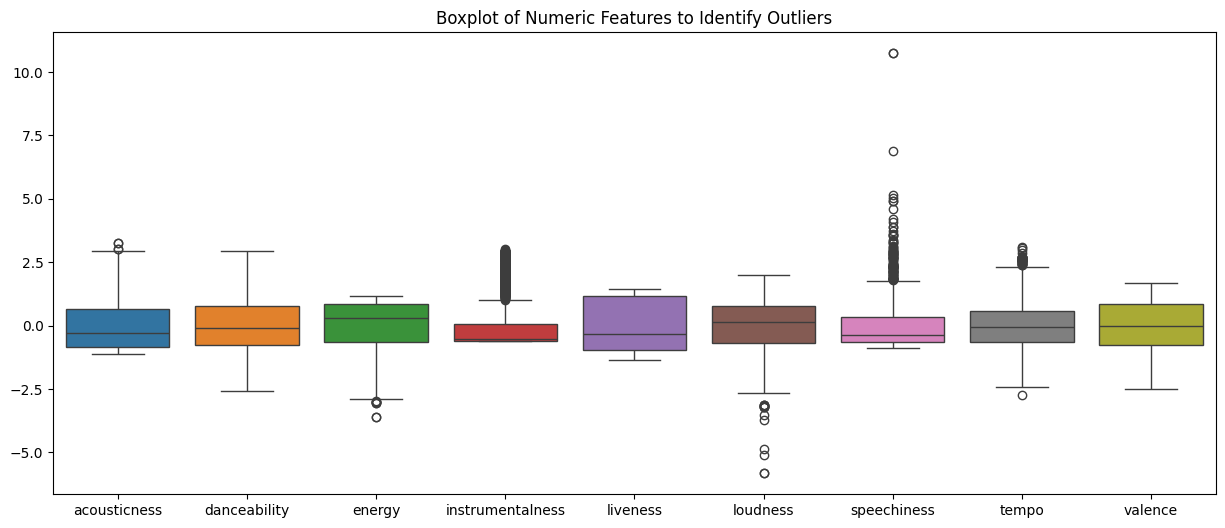

In [34]:
# Plotting boxplots for numeric columns to identify outliers
plt.figure(figsize=(15, 6))
sns.boxplot(df[numeric_col])
plt.title('Boxplot of Numeric Features to Identify Outliers')

plt.show()

In [37]:
# Remove outliers based on Z-score
df = df[(np.abs(stats.zscore(df[numeric_col])) < 3).all(axis=1)]

# Create a feature for the decade of release
df['release_decade'] = (df['year'] // 10) * 10

# Ensure consistent capitalization for album names
df['album'] = df['album'].str.title()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1519 entries, 1 to 1609
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              1519 non-null   object        
 1   album             1519 non-null   object        
 2   release_date      1519 non-null   datetime64[ns]
 3   track_number      1519 non-null   int64         
 4   id                1519 non-null   object        
 5   uri               1519 non-null   object        
 6   acousticness      1519 non-null   float64       
 7   danceability      1519 non-null   float64       
 8   energy            1519 non-null   float64       
 9   instrumentalness  1519 non-null   float64       
 10  liveness          1519 non-null   float64       
 11  loudness          1519 non-null   float64       
 12  speechiness       1519 non-null   float64       
 13  tempo             1519 non-null   float64       
 14  valence           1519 non-nu

# Step 3 : Perform exploratory data analysis and feature engineering

In [44]:
df.head(2)

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,...,loudness,speechiness,tempo,valence,popularity,duration_ms,year,month,day,release_decade
1,Street Fighting Man - Live,Licked Live In Nyc,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.820518,-1.007963,0.960062,0.249238,...,0.724545,0.123753,0.183852,-1.142678,34,253173,2022,6,10,2020
2,Start Me Up - Live,Licked Live In Nyc,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.728140,-0.584626,0.982305,0.853953,...,0.680109,0.881280,0.136323,-1.164306,34,263160,2022,6,10,2020


Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

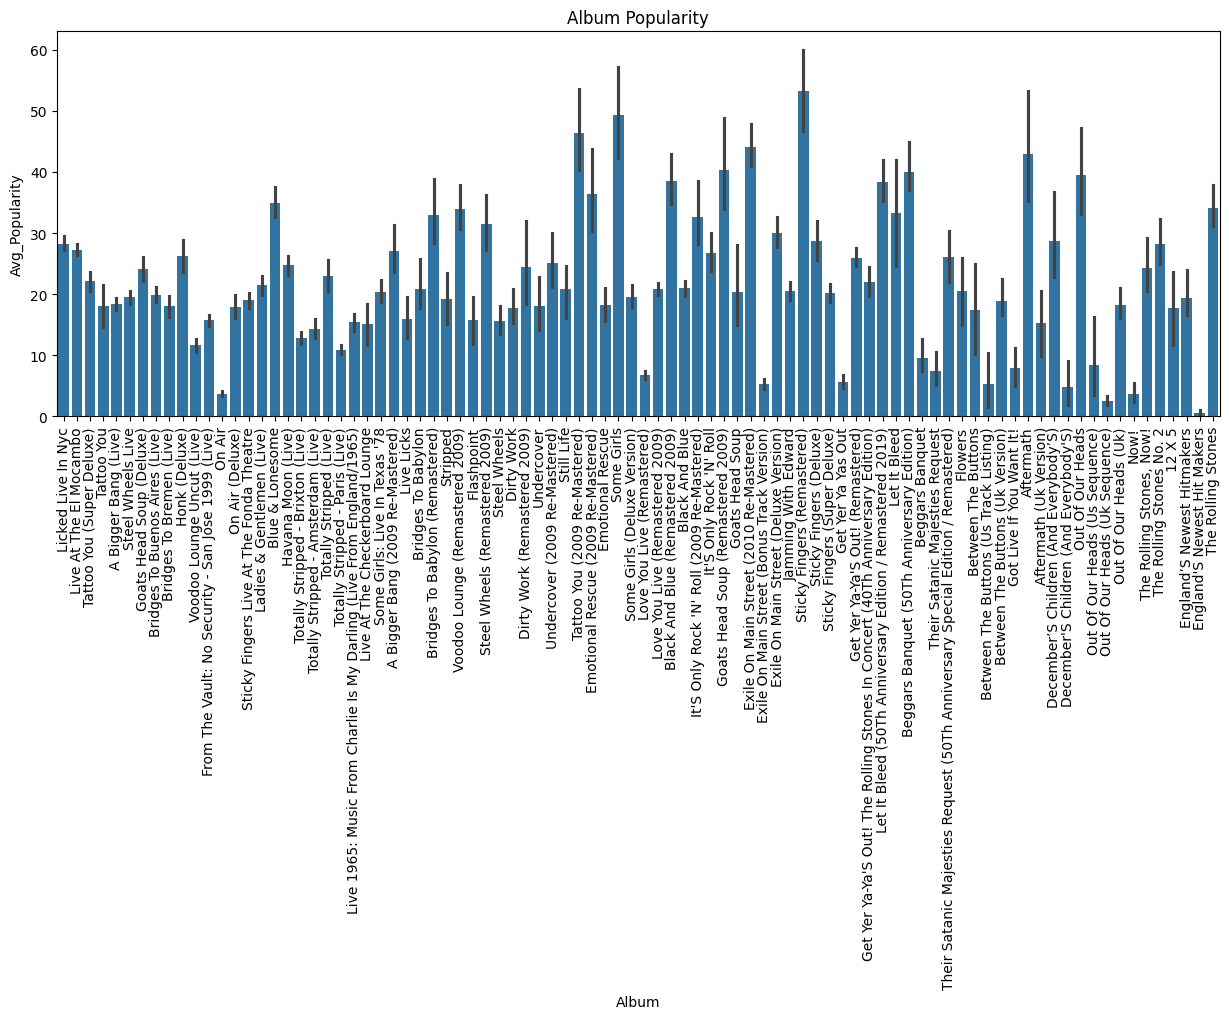

In [57]:
df.groupby('album')['popularity'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(x='album',y='popularity',data= df)
plt.xlabel('Album')
plt.ylabel('Avg_Popularity')
plt.title('Album Popularity')
plt.xticks(rotation=90)
plt.show()

In [61]:
# # Identify the two albums with the most popular songs
most_popular_albums = df.groupby('album')['popularity'].mean().nlargest(2)
most_popular_albums

,popularity
album,
Sticky Fingers (Remastered),53.300000
Some Girls,49.333333
